In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levene
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import kruskal

# Hypothesis Testing

In [2]:
category_attributes = pd.read_parquet('data\category_attributes.parquet')

category_attributes.head()

,Category,No_of_attribute,Attribute_list
0,Men Tshirts,5,"[color, neck, pattern, print_or_pattern_type, ..."
1,Sarees,10,"[blouse_pattern, border, border_width, color, ..."
2,Kurtis,9,"[color, fit_shape, length, occasion, ornamenta..."
3,Women Tshirts,8,"[color, fit_shape, length, pattern, print_or_p..."
4,Women Tops & Tunics,10,"[color, fit_shape, length, neck_collar, ocassi..."


In [3]:
train_df = pd.read_csv('data/train.csv')

train_df.head()

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,0,Men Tshirts,5,default,round,printed,default,short sleeves,NaN,NaN,NaN,NaN,NaN
1,1,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
2,2,Men Tshirts,5,default,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
3,3,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
4,4,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN


In [4]:
features = pd.read_csv('features.csv')

In [5]:
features.head()

,id,Category,bounding_box_x,bounding_box_y,bounding_box_w,bounding_box_h,silhouette1,silhouette2,silhouette3,silhouette4,...,blue11,blue12,blue13,blue14,blue15,blue16,blue17,blue18,blue19,blue20
0,0.0,Men Tshirts,217,46,143,75,374952.0,0.0,0.0,0.0,...,0.122677,0.095433,0.047370,0.011794,0.004233,0.001212,0.000000,0.000000,0.000000,0.000000
1,1.0,Men Tshirts,0,46,360,266,136812.0,0.0,0.0,0.0,...,0.017543,0.023911,0.044856,0.069716,0.108896,0.189272,0.310509,0.184347,0.012420,0.551064
2,2.0,Men Tshirts,0,46,360,266,132129.0,0.0,0.0,0.0,...,0.024425,0.042208,0.090412,0.128846,0.254139,0.239908,0.060759,0.006883,0.007186,0.543078
3,3.0,Men Tshirts,0,46,360,266,170487.0,0.0,0.0,0.0,...,0.028592,0.064764,0.172375,0.080296,0.091523,0.176783,0.127448,0.005603,0.008157,0.564813
4,4.0,Men Tshirts,0,46,360,266,126828.0,0.0,0.0,0.0,...,0.016102,0.022409,0.040494,0.066294,0.099113,0.095544,0.120055,0.255855,0.219069,0.574097


In [6]:
print("Non-finite values in 'id' column:")
print(features[~features['id'].isin([np.nan, np.inf])])

Non-finite values in 'id' column:
            id             Category  bounding_box_x  bounding_box_y  \
0          0.0          Men Tshirts             217              46   
1          1.0          Men Tshirts               0              46   
2          2.0          Men Tshirts               0              46   
3          3.0          Men Tshirts               0              46   
4          4.0          Men Tshirts               0              46   
...        ...                  ...             ...             ...   
70208  70374.0  Women Tops & Tunics               0              90   
70209  70375.0  Women Tops & Tunics              45               0   
70210  70376.0  Women Tops & Tunics               0              45   
70211  70377.0  Women Tops & Tunics              60               0   
70212  70378.0  Women Tops & Tunics              45               0   

       bounding_box_w  bounding_box_h  silhouette1  silhouette2  silhouette3  \
0                 143            

In [7]:
features = features[features['id'].notna() & ~features['id'].isin([np.inf])]

In [8]:
features.head()

,id,Category,bounding_box_x,bounding_box_y,bounding_box_w,bounding_box_h,silhouette1,silhouette2,silhouette3,silhouette4,...,blue11,blue12,blue13,blue14,blue15,blue16,blue17,blue18,blue19,blue20
0,0.0,Men Tshirts,217,46,143,75,374952.0,0.0,0.0,0.0,...,0.122677,0.095433,0.047370,0.011794,0.004233,0.001212,0.000000,0.000000,0.000000,0.000000
1,1.0,Men Tshirts,0,46,360,266,136812.0,0.0,0.0,0.0,...,0.017543,0.023911,0.044856,0.069716,0.108896,0.189272,0.310509,0.184347,0.012420,0.551064
2,2.0,Men Tshirts,0,46,360,266,132129.0,0.0,0.0,0.0,...,0.024425,0.042208,0.090412,0.128846,0.254139,0.239908,0.060759,0.006883,0.007186,0.543078
3,3.0,Men Tshirts,0,46,360,266,170487.0,0.0,0.0,0.0,...,0.028592,0.064764,0.172375,0.080296,0.091523,0.176783,0.127448,0.005603,0.008157,0.564813
4,4.0,Men Tshirts,0,46,360,266,126828.0,0.0,0.0,0.0,...,0.016102,0.022409,0.040494,0.066294,0.099113,0.095544,0.120055,0.255855,0.219069,0.574097


In [9]:
features['id'] = features['id'].astype(int)

features.head()

,id,Category,bounding_box_x,bounding_box_y,bounding_box_w,bounding_box_h,silhouette1,silhouette2,silhouette3,silhouette4,...,blue11,blue12,blue13,blue14,blue15,blue16,blue17,blue18,blue19,blue20
0,0,Men Tshirts,217,46,143,75,374952.0,0.0,0.0,0.0,...,0.122677,0.095433,0.047370,0.011794,0.004233,0.001212,0.000000,0.000000,0.000000,0.000000
1,1,Men Tshirts,0,46,360,266,136812.0,0.0,0.0,0.0,...,0.017543,0.023911,0.044856,0.069716,0.108896,0.189272,0.310509,0.184347,0.012420,0.551064
2,2,Men Tshirts,0,46,360,266,132129.0,0.0,0.0,0.0,...,0.024425,0.042208,0.090412,0.128846,0.254139,0.239908,0.060759,0.006883,0.007186,0.543078
3,3,Men Tshirts,0,46,360,266,170487.0,0.0,0.0,0.0,...,0.028592,0.064764,0.172375,0.080296,0.091523,0.176783,0.127448,0.005603,0.008157,0.564813
4,4,Men Tshirts,0,46,360,266,126828.0,0.0,0.0,0.0,...,0.016102,0.022409,0.040494,0.066294,0.099113,0.095544,0.120055,0.255855,0.219069,0.574097


In [10]:
print(features['red1'])
print(features['blue1'])
print(features['green1'])

0        0.259150
1        0.693027
2        0.706441
3        0.721944
4        0.694746
           ...   
70208    0.957479
70209    0.705736
70210    0.654199
70211    0.871749
70212    0.513890
Name: red1, Length: 70213, dtype: float64
0        0.259150
1        0.693027
2        0.706441
3        0.721944
4        0.694746
           ...   
70208    0.957479
70209    0.705736
70210    0.654199
70211    0.871749
70212    0.513890
Name: blue1, Length: 70213, dtype: float64
0        0.259150
1        0.693027
2        0.706441
3        0.721944
4        0.694746
           ...   
70208    0.957479
70209    0.705736
70210    0.654199
70211    0.871749
70212    0.513890
Name: green1, Length: 70213, dtype: float64


KeyboardInterrupt: 

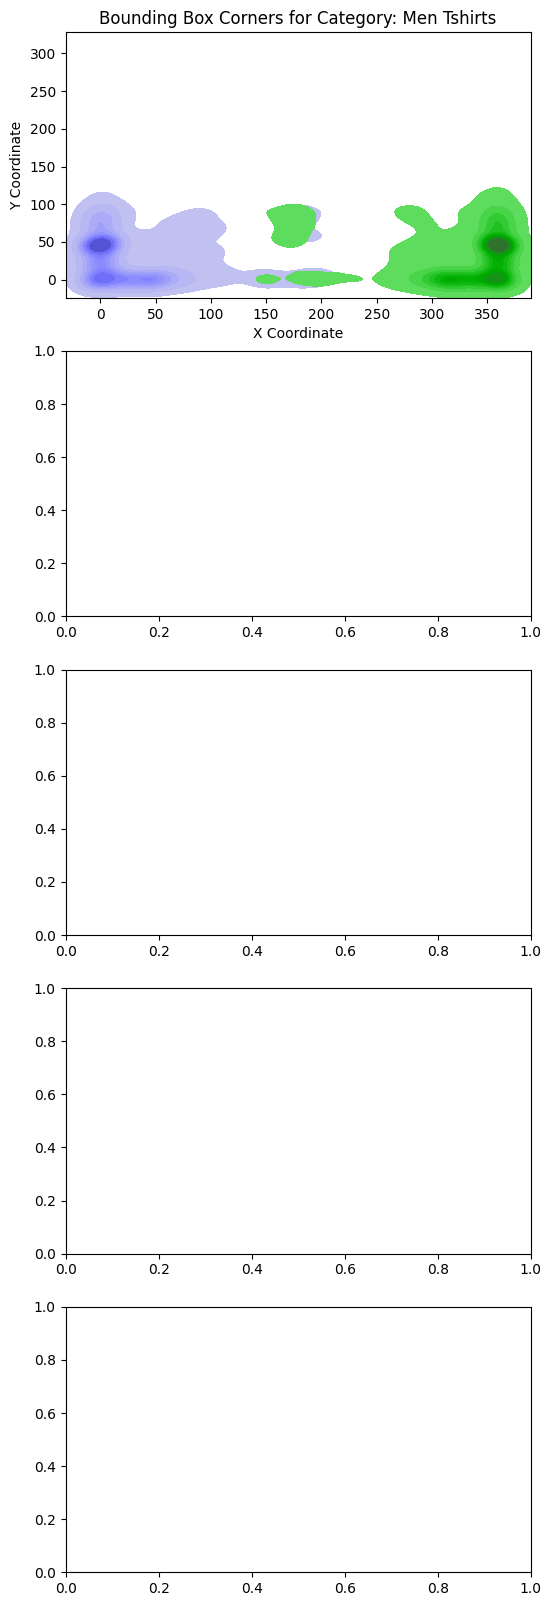

In [11]:
colors = ['blue', 'green', 'red', 'purple']

# Get unique categories, excluding NA values
unique_categories = features['Category'].dropna().unique()

# Create subplots
num_categories = len(unique_categories)
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(6, 4 * num_categories))

# Loop through each category and create a subplot
for ax, category in zip(axes, unique_categories):
    category_data = features[features['Category'] == category]

    ax.set_title(f"Bounding Box Corners for Category: {category}")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")

    # Plot the KDE for each corner
    sns.kdeplot(x=category_data['bounding_box_x'], y=category_data['bounding_box_y'], color=colors[0], label='(x, y)', fill=True, ax=ax)
    sns.kdeplot(x=category_data['bounding_box_x'] + category_data['bounding_box_w'], 
                y=category_data['bounding_box_y'], color=colors[1], label='(x + w, y)', fill=True, ax=ax)
    sns.kdeplot(x=category_data['bounding_box_x'], 
                y=category_data['bounding_box_y'] + category_data['bounding_box_h'], color=colors[2], label='(x, y + h)', fill=True, ax=ax)
    sns.kdeplot(x=category_data['bounding_box_x'] + category_data['bounding_box_w'], 
                y=category_data['bounding_box_y'] + category_data['bounding_box_h'], color=colors[3], label='(x + w, y + h)', fill=True, ax=ax)

    ax.legend()  # Show the legend for each subplot

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Hypotheses and Test Approach for Bounding Box Variance Analysis

### Null and Alternate Hypotheses

**For Levene’s Test (for each attribute like `bounding_box_x`, `bounding_box_y`, `bounding_box_w`, and `bounding_box_h`):**

1. **Null Hypothesis (\( H_0 \))**:  
   - The variances of the bounding box attribute within each category are equal to the overall variance across categories.
   - This implies that there is no significant difference in variance between within-category and across-category variances.

2. **Alternate Hypothesis (\( H_1 \))**:  
   - The variances of the bounding box attribute within each category are significantly different from the overall variance across categories.
   - This suggests that there is a difference in consistency of bounding box attributes within categories compared to across categories.

### Test Approach

1. **Compute Variance**:  
   - Calculate the variance of each bounding box attribute within each category.
   - Calculate the overall variance across all categories for each attribute.

2. **Levene’s Test**:  
   - Use Levene’s Test to statistically compare the variances within categories to the overall variance across categories for each attribute (`bounding_box_x`, `bounding_box_y`, `bounding_box_w`, and `bounding_box_h`).
   - If the p-value from Levene's Test is less than the chosen significance level (e.g., 0.05), reject the null hypothesis.

3. **Interpretation**:  
   - A significant result (p-value < 0.05) suggests that within-category variance is different from across-category variance, indicating a difference in consistency.
   - A non-significant result suggests similar levels of variance within and across categories.

Consistent Variances:\
After calculating the within-category variances and performing Levene's test, if the mean within-category variance for a bounding box attribute (like bounding_box_x, bounding_box_y, etc.) is lower than the overall variance and the p-value is significant, it suggests that bounding boxes are more consistent within each category. This would imply that the variance is smaller within categories compared to across the dataset, which supports the idea of similar framing within categories.\
\
Inconsistent Variances:\
If the mean within-category variance is higher than the overall variance and the Levene's test is significant, it indicates that bounding boxes are less consistent within each category. This would suggest greater variability in framing even within categories, possibly due to variations in how products are presented in images.

In [30]:
attributes = ['bounding_box_x', 'bounding_box_y', 'bounding_box_w', 'bounding_box_h']
levene_results = []

for attribute in attributes:
    # Get overall variance across categories
    overall_variance = features[attribute].var()
    
    # Calculate within-category variances
    category_variances = features.groupby('Category')[attribute].var().values
    
    # Levene's Test to compare within-category variances with the overall variance
    stat, p_value = levene(*[features[features['Category'] == cat][attribute] for cat in features['Category'].unique()])
    
    # Store results
    levene_results.append({
        'Attribute': attribute,
        'Overall Variance': overall_variance,
        'Mean Within-Category Variance': np.mean(category_variances),
        'Levene Statistic': stat,
        'p-value': p_value
    })

# Convert results to DataFrame for easy viewing
levene_df = pd.DataFrame(levene_results)
print(levene_df)

# Interpretation of results
for index, row in levene_df.iterrows():
    if row['p-value'] < 0.05:
        print(f"Significant difference in variances for {row['Attribute']} (p-value = {row['p-value']}). This suggests variance within categories is significantly different from variance across categories. Null hypothesis rejected.")
    else:
        print(f"No significant difference in variances for {row['Attribute']} across categories (p-value = {row['p-value']}). No significant evidence to reject null hypothesis.")

        Attribute  Overall Variance  Mean Within-Category Variance  \
0  bounding_box_x       2048.753085                    1855.830536   
1  bounding_box_y       1851.489795                    1565.508997   
2  bounding_box_w       5023.666952                    4478.164980   
3  bounding_box_h       4481.576046                    4079.009192   

   Levene Statistic        p-value  
0        147.368229  9.982502e-126  
1       1838.211225   0.000000e+00  
2        335.500224  1.437120e-286  
3       1073.124111   0.000000e+00  
Significant difference in variances for bounding_box_x (p-value = 9.982502094986381e-126). This suggests variance within categories is significantly different from variance across categories. Null hypothesis rejected.
Significant difference in variances for bounding_box_y (p-value = 0.0). This suggests variance within categories is significantly different from variance across categories. Null hypothesis rejected.
Significant difference in variances for boundin

In [31]:
attributes = ['bounding_box_x', 'bounding_box_y', 'bounding_box_w', 'bounding_box_h']
levene_results = []

for attribute in attributes:
    # get overall mean across categories
    overall_mean = features[attribute].mean()

    # Calculate within-category means
    category_means = features.groupby('Category')[attribute].mean().values

    # Levene's Test to compare within-category means with the overall mean
    stat, p_value = levene(*[features[features['Category'] == cat][attribute] for cat in features['Category'].unique()])

    # Store results
    levene_results.append({
        'Attribute': attribute,
        'Overall Mean': overall_mean,
        'Mean Within-Category Mean': np.mean(category_means),
        'Levene Statistic': stat,
        'p-value': p_value
    })

# Convert results to DataFrame for easy viewing
levene_df = pd.DataFrame(levene_results)
print(levene_df)

# Interpretation of results
for index, row in levene_df.iterrows():
    if row['p-value'] < 0.05:
        print(f"Significant difference in means for {row['Attribute']} (p-value = {row['p-value']}). This suggests means within categories are significantly different from the overall mean. Null hypothesis rejected.")
    else:
        print(f"No significant difference in means for {row['Attribute']} across categories (p-value = {row['p-value']}). No significant evidence to reject null hypothesis.")

        Attribute  Overall Mean  Mean Within-Category Mean  Levene Statistic  \
0  bounding_box_x     43.711934                  42.417888        147.368229   
1  bounding_box_y     24.433367                  23.718586       1838.211225   
2  bounding_box_w    275.400638                 277.669252        335.500224   
3  bounding_box_h    316.006181                 315.857662       1073.124111   

         p-value  
0  9.982502e-126  
1   0.000000e+00  
2  1.437120e-286  
3   0.000000e+00  
Significant difference in means for bounding_box_x (p-value = 9.982502094986381e-126). This suggests means within categories are significantly different from the overall mean. Null hypothesis rejected.
Significant difference in means for bounding_box_y (p-value = 0.0). This suggests means within categories are significantly different from the overall mean. Null hypothesis rejected.
Significant difference in means for bounding_box_w (p-value = 1.4371198513554306e-286). This suggests means within cate

## Hypotheses

1. **Null Hypothesis (H₀)**:
   - There is no significant difference in the color consistency (variance of color distributions) across different product categories. This implies that the color distributions within each category are similar.

2. **Alternative Hypothesis (H₁)**:
   - There is a significant difference in the color consistency (variance of color distributions) across different product categories. This suggests that the color distributions within at least one category are different from the others.

## Testing Method

- **Statistical Test**: **ANOVA (Analysis of Variance)**
  - ANOVA is used to compare the means of color histograms across different categories. It assesses whether any of the category means are statistically significantly different from each other.
  
- **Steps**:
  1. Compute the color histograms for each product based on RGB values.
  2. Group the histograms by product category.
  3. Calculate the variance of the histograms within each category.
  4. Perform the ANOVA test on the variances to determine if there are significant differences across categories.
  5. Evaluate the p-value from the ANOVA test:
     - If p-value < 0.05: Reject H₀ (indicating a significant difference in color consistency).
     - If p-value ≥ 0.05: Fail to reject H₀ (indicating no significant difference in color consistency).


1. Consistent Variances:\
The color distributions of the products across categories are statistically similar, suggesting a uniformity in how colors are represented in the product images.
This may indicate effective standardization of color representation across categories, which can be beneficial for brand consistency and consumer recognition.

2. Inconsistent Variances:\
The variance in color distributions differs across categories, suggesting that the color representation for at least one category is notably distinct from others.
This may point to potential issues in color consistency that could affect customer perception and product identification.
It may also indicate opportunities for improvement in color standardization strategies or highlight unique characteristics of specific categories that could be leveraged in marketing or design.

In [10]:
# Step 2: Create histograms for each product based on RGB values
def compute_histogram(row):
    # Combine RGB values into a single array
    rgb_values = np.array([row[f'red{i+1}'] for i in range(20)] + 
                          [row[f'green{i+1}'] for i in range(20)] + 
                          [row[f'blue{i+1}'] for i in range(20)])
    # Normalize the histogram
    hist, _ = np.histogram(rgb_values, bins=10, range=(0, 1))  # Adjust range as necessary
    return hist / hist.sum()  # Normalize to get probability distribution

# Apply the histogram computation to each row
features['histogram'] = features.apply(compute_histogram, axis=1)

# Step 3: Convert histograms to numpy arrays for easier manipulation
features['histogram'] = features['histogram'].apply(np.array)

# Step 4: Compute within-category variances for color histograms
category_variances = features.groupby('Category')['histogram'].apply(
    lambda x: np.var(np.vstack(x), axis=0).mean()
)

print("Category Variances:\n", category_variances)

# Prepare data for ANOVA
anova_data = [np.vstack(features[features['Category'] == category]['histogram']).flatten()
              for category in features['Category'].unique()]

# Step 5: Perform ANOVA test
anova_result = f_oneway(*anova_data)

print("ANOVA Result:", anova_result)

# Interpretation
if anova_result.pvalue < 0.05:
    print("Reject H0: There is a significant difference in color consistency across categories.")
else:
    print("Fail to reject H0: No significant difference in color consistency across categories.")


Category Variances:
 Category
Kurtis                 0.003994
Men Tshirts            0.004293
Sarees                 0.006932
Women Tops & Tunics    0.004084
Women Tshirts          0.003973
Name: histogram, dtype: float64
ANOVA Result: F_onewayResult(statistic=3.8732815080184455e-29, pvalue=1.0)
Fail to reject H0: No significant difference in color consistency across categories.


In [11]:
def compute_histogram(row):
    rgb_values = np.array([row[f'red{i+1}'] for i in range(20)] + 
                          [row[f'green{i+1}'] for i in range(20)] + 
                          [row[f'blue{i+1}'] for i in range(20)])
    hist, _ = np.histogram(rgb_values, bins=10, range=(0, 1))
    return hist / hist.sum()

features['histogram'] = features.apply(compute_histogram, axis=1)

def create_attribute_mapping(category):
    attributes = category_attributes.loc[category_attributes['Category'] == category, 'Attribute_list'].values
    attributes = attributes[0]  
    return {f'attr_{i + 1}': attributes[i] for i in range(len(attributes)) if attributes[i]}

color_attribute_data = {}

for category in train_df['Category'].unique():
    attribute_mapping = create_attribute_mapping(category)

    for attr_key, attr_value in attribute_mapping.items():
        if attr_value == 'color':  # Only consider the 'color' attribute
            category_df = train_df[train_df['Category'] == category]
            
            for color in category_df[attr_key].dropna().unique():
                color_histograms = features[features['Category'] == category]['histogram'].tolist()

                if color not in color_attribute_data:
                    color_attribute_data[color] = []

                color_attribute_data[color].extend(color_histograms)

In [12]:
anova_data = [np.vstack(color_attribute_data[color]).flatten() for color in color_attribute_data]

anova_result = f_oneway(*anova_data)

print("ANOVA Result:", anova_result)

if anova_result.pvalue < 0.05:
    print("Reject H0: There is a significant difference in color consistency across color attributes.")
else:
    print("Fail to reject H0: No significant difference in color consistency across color attributes.")

ANOVA Result: F_onewayResult(statistic=-1.822173665851819e-29, pvalue=nan)
Fail to reject H0: No significant difference in color consistency across color attributes.


In [11]:
anova_data = pd.DataFrame(anova_data).T

anova_data.head()

,0,1,2,3,4
0,0.60,0.65,0.60,0.50,0.7
1,0.25,0.20,0.30,0.25,0.1
2,0.05,0.00,0.00,0.10,0.0
3,0.05,0.10,0.00,0.05,0.1
4,0.00,0.00,0.05,0.05,0.0


In [20]:
grouped_data = [color_attribute_data[color] for color in color_attribute_data]

levene_statistic, levene_pvalue = levene(*grouped_data)

# Print results
print("Levene's test statistics:", levene_statistic)
print("Levene's test p-values:", levene_pvalue)

# If they are arrays, loop through the results
if isinstance(levene_pvalue, np.ndarray):
    for i, p_val in enumerate(levene_pvalue):
        print(f"Group {i+1} p-value: {p_val}")
        if p_val < 0.05:
            print(f"Group {i+1}: The assumption of homogeneity of variances is violated.")
        else:
            print(f"Group {i+1}: The assumption of homogeneity of variances is not violated.")
else:
    # Handle the single p-value case
    if levene_pvalue < 0.05:
        print("The assumption of homogeneity of variances is violated.")
    else:
        print("The assumption of homogeneity of variances is not violated.")

Levene's test statistics: [1107.35604132 1773.85244836  138.63367113   47.67921428   31.63737924
  478.45124392  193.82094135  278.59560169  226.43980564  237.9832161 ]
Levene's test p-values: [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.31049478e-142
 1.46753955e-091 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
Group 1 p-value: 0.0
Group 1: The assumption of homogeneity of variances is violated.
Group 2 p-value: 0.0
Group 2: The assumption of homogeneity of variances is violated.
Group 3 p-value: 0.0
Group 3: The assumption of homogeneity of variances is violated.
Group 4 p-value: 1.3104947849904472e-142
Group 4: The assumption of homogeneity of variances is violated.
Group 5 p-value: 1.4675395545405168e-91
Group 5: The assumption of homogeneity of variances is violated.
Group 6 p-value: 0.0
Group 6: The assumption of homogeneity of variances is violated.
Group 7 p-value: 0.0
Group 7: The assumption of homogeneity of variances is violated.
Gr

In [21]:
welch_result = f_oneway(*[data for data in anova_data if len(data) > 0])
print("Welch's ANOVA Result:", welch_result)

Welch's ANOVA Result: F_onewayResult(statistic=-1.822173665851819e-29, pvalue=nan)


In [25]:
kruskal_result = kruskal(*anova_data)
print("Kruskal-Wallis H-test Result:", kruskal_result)

if kruskal_result.pvalue < 0.05:
    print("Reject H0: There is a significant difference in color consistency across color attributes.")
else:
    print("Fail to reject H0: No significant difference in color consistency across color attributes.")

Kruskal-Wallis H-test Result: KruskalResult(statistic=586.3381854513796, pvalue=2.832170179004449e-115)
Reject H0: There is a significant difference in color consistency across color attributes.


In [13]:
if any(np.isnan(data).any() for data in anova_data):
    print("One or more data arrays contain NaN values.")
else:
    print("No NaN values found in data arrays.")


No NaN values found in data arrays.


In [15]:
if any(len(data) < 2 for data in anova_data):
    print("One or more groups do not have enough data for ANOVA.")
else:
    print("All groups have at least 2 data points for ANOVA.")

All groups have at least 2 data points for ANOVA.


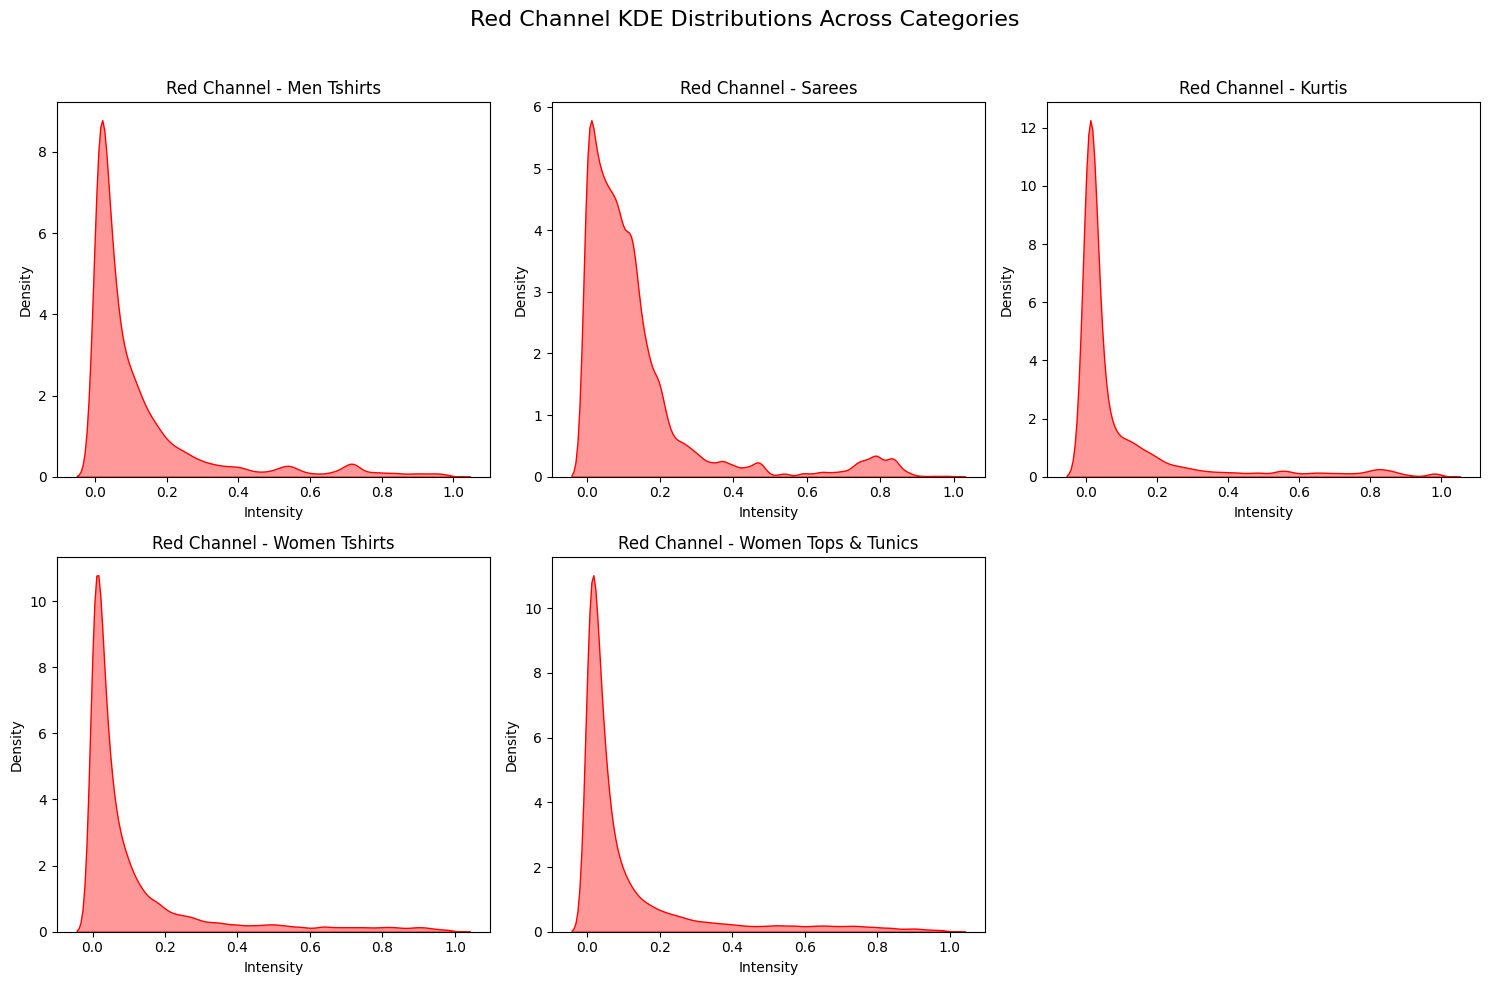

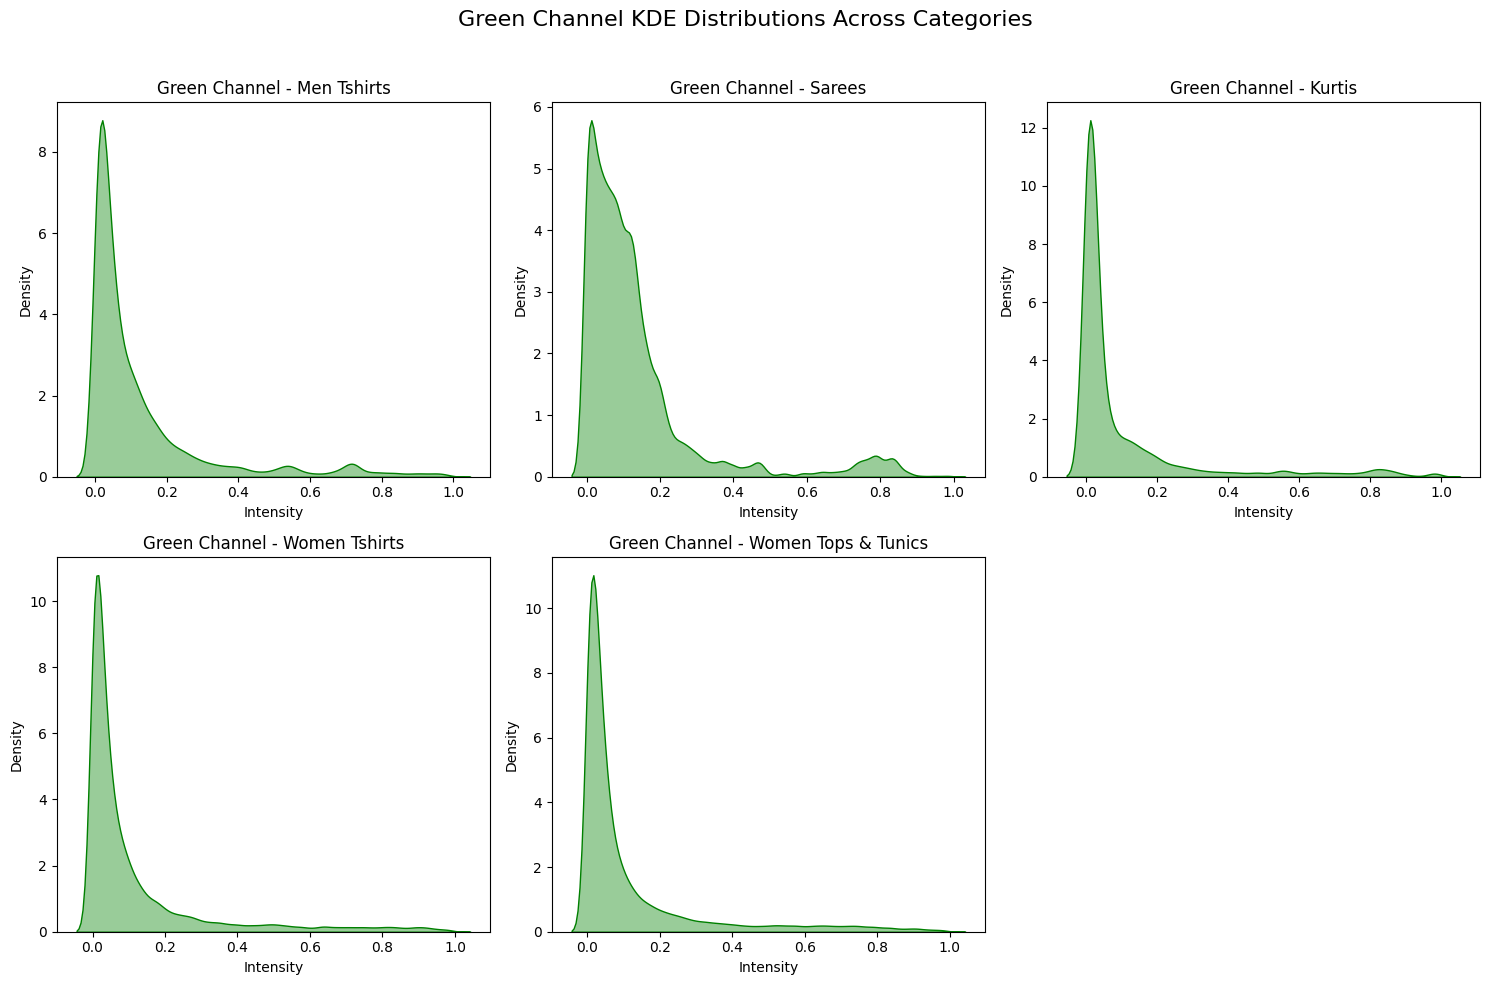

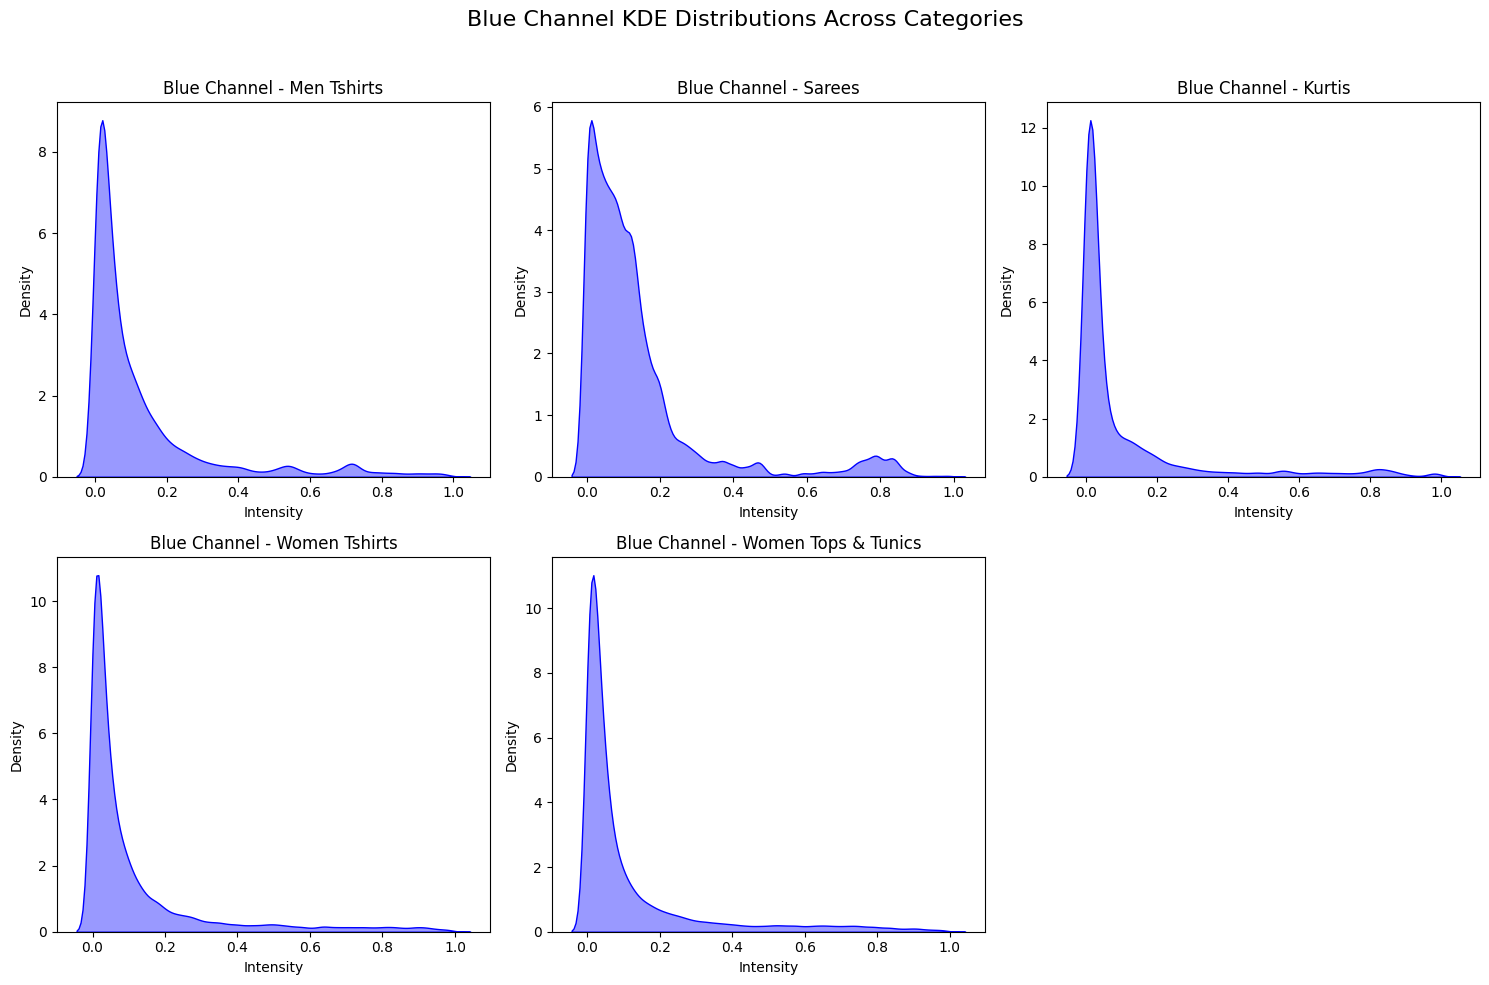

In [ ]:
color_columns = {
    'red': [f'red{i}' for i in range(1, 21)],
    'green': [f'green{i}' for i in range(1, 21)],
    'blue': [f'blue{i}' for i in range(1, 21)]
}

# Generate separate KDE plots for each color channel
for color, columns in color_columns.items():
    plt.figure(figsize=(15, 10))
    categories = features['Category'].unique()
    
    # Set up subplots
    num_categories = len(categories)
    rows = (num_categories + 2) // 3  # Adjust rows for layout
    cols = 3  # Display 3 plots per row
    
    for idx, category in enumerate(categories):
        plt.subplot(rows, cols, idx + 1)
        
        # Filter data for the current category and color channel
        category_data = features[features['Category'] == category][columns]
        
        # Flatten the DataFrame to get a single array of intensities for KDE
        intensity_data = category_data.values.flatten()
        
        # Remove NaN values if any
        intensity_data = intensity_data[~pd.isna(intensity_data)]
        
        # Plot filled KDE for this category and color channel
        sns.kdeplot(intensity_data, fill=True, alpha=0.4, color=color)  # Use color variable
        
        plt.title(f'{color.capitalize()} Channel - {category}')
        plt.xlabel('Intensity')
        plt.ylabel('Density')
    
    plt.suptitle(f'{color.capitalize()} Channel KDE Distributions Across Categories', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()